/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


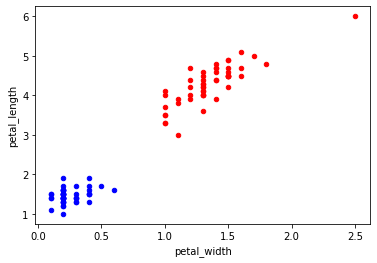

<Figure size 432x288 with 0 Axes>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import pandas as pd
import seaborn as sns

from sklearn import datasets

iris = sns.load_dataset('iris')
n_samples = 100

data = iris[:n_samples+1]
columns = ['petal_width', 'petal_length']
x = data[columns]
y = data['species']

y = (y == 'setosa').astype(int)

def plot_iris(x, y, colors, ax=None):
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
    
    plt.figure()
    x1 = x.columns[0]
    x2 = x.columns[1]

    for (species, group), c in zip(x.groupby(y), colors):
        group.plot(kind='scatter', x=x1, y=x2, color=c, ax=ax)
  
    return ax
    
plot_iris(x, y, colors=['red', 'blue'])
plt.show()

In [0]:
def sigmoid(x):
    return 1. / (1. + np.exp(-x))

def calc_y(x, w, b):
    return sigmoid(np.dot(x, w) + b)

def calc_grad(x, y, w, b):
    # ∂E(w) / ∂w = (y - t)φ(x)
    error = y - calc_y(x, w, b)
    w_grad = -np.mean(x.T * error, axis=1)
    b_grad = -np.mean(error)
    #print('w_grad', w_grad)

    return w_grad, b_grad

In [0]:
nb_epochs = 20

In [0]:
def GradientDescent(x, y, w, b, eta=0.1):
    # for( i = 1; i < nb_epochs; i++) {
    for i in range(1, nb_epochs):
        # 勾配 g を取得
        w_grad, b_grad = calc_grad(x, y, w, b)
        # 勾配をもとに w と b を少し変える
        w = w - eta * w_grad
        b = b - eta * b_grad
        # 教師データと求めた値の差の絶対値の平均
        e = np.mean(np.abs(y - calc_y(x, w, b)))
        yield i, w, b, e

In [0]:
def SGD(x, y, w, b, eta=0.4):
    for i in range(1, nb_epochs):
        indexer = np.arange(x.shape[0])
        np.random.shuffle(indexer)
        for index in indexer:
            _x = x.iloc[[index], ]
            _y = y.iloc[[index], ]
            w_grad, b_grad = calc_grad(_x, _y, w, b)
            w -= eta * w_grad
            b -= eta * b_grad
            e = np.mean(np.abs(y - calc_y(x, w, b)))
            yield i, w, b, e

In [0]:

def MiniBatchSGD(x, y, w, b, eta=0.4, batch_size=16):
    for i in range(1, nb_epochs):
        indexer = np.arange(x.shape[0])
        np.random.shuffle(indexer)
        for index in indexer:

            # ミニバッチを取り出す
            batch_x = x[index:index+batch_size]
            batch_y = y[index:index+batch_size]
            w_grad, b_grad = calc_grad(batch_x, batch_y, w, b)
            w -= eta * w_grad
            b -= eta * b_grad
            e = np.mean(np.abs(y - calc_y(x, w, b)))
            yield i, w, b, e


In [0]:
from matplotlib import animation, rc
from IPython.display import HTML
%matplotlib inline


def plot_result(x, y, solver, title, animation_max_length=100):
    fig = plt.figure()

    ax = fig.add_subplot(1, 1, 1)
    plt.xlim([0.0, 3.0])
    plt.ylim([-1.0, 8.0])

    art_objs = []
    loss_x = []
    loss_y = []
    
    bx = np.arange(x.iloc[:, 0].min(), x.iloc[:, 0].max(), 0.1)

    w = np.zeros(2)
    b = 0
    gen = solver(x, y, w, b)

    for i, w, b, e in gen:
        if len(art_objs) < animation_max_length:
            by = -b / w[1] - w[0] / w[1] * bx
            l = ax.plot(bx, by, color='gray', linestyle='dashed')
            art_objs.append(l)
            
        loss_x.append(i)
        loss_y.append(e)

    ax = plot_iris(x, y, colors=['red', 'blue'], ax=ax)
    ax.set_title(title)

    anim = animation.ArtistAnimation(fig, art_objs, interval=100, repeat=True, blit=True, repeat_delay=1000)
    
    #plt.plot(loss_x, loss_y)
    
    return anim

rc('animation', html='jshtml')

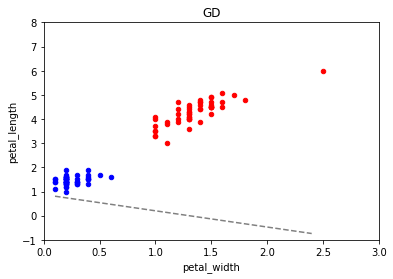

<Figure size 432x288 with 0 Axes>

In [8]:
plot_result(x, y, GradientDescent, title='GD')

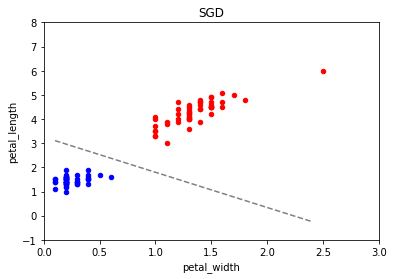

<Figure size 432x288 with 0 Axes>

In [9]:
plot_result(x, y, SGD, title='SGD')

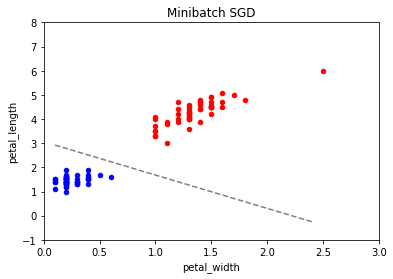

<Figure size 432x288 with 0 Axes>

In [10]:
plot_result(x, y, MiniBatchSGD, title='Minibatch SGD')